# Interpolation

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Linear Interpolation

Suppose we are given a function $f(x)$ at just two points, $x=a$ and $x=b$, and you want to know the function at another point in between. The simplest way to find an estimate of this value is using linear interpolation. Linear interpolation assumes the function follows a straight line between two points. The slope of the straight line approximate is:
$$ m = \frac{f(b) - f(a)}{b - a} $$

Then the value $f(x)$ can be approximated by:
$$ f(x) \approx \frac{f(b) - f(a)}{b-a} (x-a) + f(a) $$

#### Step 1: Define a linear function

Create a linear function $f(x) = ax + b$. Linear interpolation will yield an accurate answer for a a linear function. This is how we will test our linear interpolation.

In [19]:
def my_function(x):
    # TO DO: Create a linear function
    return x + 1

#### Step 2: Implement the linear interpolation
Using the equations given above, implement the linear interpolation function

In [4]:
def linear_interpolation(x, a, fa, b, fb):
    """
    Fits a line to points (a, f(a)) and (b, f(b)) and returns an 
    approximation for f(x) for some value x between a and b from 
    the equation of the line.
    Parameters:
        x (float): the point of interest between a and b
        a (float): known x value
        fa (float): known f(a) value
        b (float): known x value (b > a)
        fb (float): known f(b) value
    Returns:
        (float): an approximation of f(x) using linear interpolation
    """
    # To Do: Implement the linear interpolation function
    m = (fb - fa)/(b-a)
    return m*(x-a) + fa

#### Step 3: Test your linear interpolation
Using the linear function you created and your linear interpolation function, write at least three assert statements.

In [17]:
# To DO: Create at least three assert statements using my_function and linear_interpolation
assert(linear_interpolation(2, 1, my_function(1), 3, my_function(3)) ==  my_function(2))
assert(linear_interpolation(14, 6, my_function(6), 20, my_function(20)) ==  my_function(14))
assert(linear_interpolation(8, 4, my_function(4), 10, my_function(10)) ==  my_function(8))

#### Step 4: Visualization your results
Plot your function. Using a scatter plot, plot at least three x, y points generated using your linear_interpolation function.

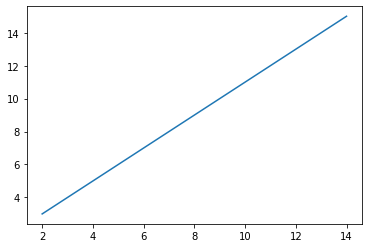

In [21]:
# To Do: Plot your function with at least three interpolated values
lx = [2,8,14]
ly = [linear_interpolation(2, 1, my_function(1), 3, my_function(3)), linear_interpolation(8, 4, my_function(4), 10, my_function(10)) ,linear_interpolation(14, 6, my_function(6), 20, my_function(20))]
plt.plot(lx,ly)


### 2nd Order Lagrangian Interpolation

If we have more than two points, a better way to get an estimate of "in between" points is using a Lagrangian Interpolation. Lagrangian Interpolation fits a nth order polynomial to a number of points. Higher order polynomials often introduce unnecessary "wiggles" that introduce error. Using many low-order polynomials often generate a better estimate. For this example, let's use a quadratic (i.e. a 2nd order polynomial). 

$$f(x) = \frac{(x-b)(x-c)}{(a - b)(a-c)}f(a) + \frac{(x-a)(x-c)}{(b-a)(b-c)}f(b) + \frac{(x - a)(x-b)}{(c - a)(c - b)} f(c) $$

#### Step 1: Define a quadratic function

Create a quadratic function $f(x) = ax^2 + bx + c$. 2nd Order Lagrangian Interpolation will yield an accurate answer for a 2nd order polynomial (i.e. a quadratic). This is how we will test our interpolation.

In [53]:
def my_function(x):
    #To Do: Create a quadratic function
    sq = x**2
    return sq + 3*x + 2

#### Step 2: Implement the 2nd Order Lagrangian Interpolation Function
Using the equations given above, implement the 2nd order lagrangian interpolation function

In [24]:
def lagrangian_interpolation(x, a, fa, b, fb, c, fc):
    """
    Fits a quadratic to points (a, f(a)), (b, f(b)), and (c, f(c)) and returns an 
    approximation for f(x) for some value x between a and c from the 
    equation of a quadratic.
    Parameters:
        x (float): the point of interest between a and b
        a (float): known x value
        fa (float): known f(a) value
        b (float): known x value (b > a)
        fb (float): known f(b) value
        c (float): known x value (c > b)
        fc (float): known f(c) value
    Returns:
        (float): an approximation of f(x) using linear interpolation
    """
    part1 = (((x-b)*(x-c))/((a-b)*(a-c)))*fa
    part2 = (((x-a)*(x-c))/((b-a)*(b-c)))*fb
    part3 = (((x-b)*(x-a))/((c-b)*(c-a)))*fc
    return part1 + part2 + part3

#### Step 3: Test your results

Using the quadratic function you created and your 2nd order lagrangian interpolation function, write at least three assert statements.

In [27]:
# To Do: Write at least three assert statements
assert(lagrangian_interpolation(2, 1,my_function(1),4, my_function(4), 10, my_function(10)) - my_function(2) < .01)
assert(lagrangian_interpolation(8, 1,my_function(1),4, my_function(4), 10, my_function(10)) - my_function(8) < .01)
assert(lagrangian_interpolation(13, 1,my_function(1),5, my_function(5), 15, my_function(15)) - my_function(13) < .01)

#### Step 4: Visualize your results
Plot your function and using a scatter plot, plot at least three x, y points generated from your lagrangian_interpolation function.

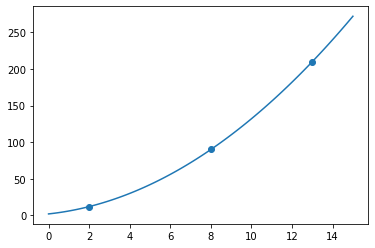

In [54]:
# To Do: Plot your function with interpolated values
x = [2, 8, 13]
y = [lagrangian_interpolation(2, 1,my_function(1),4, my_function(4), 10, my_function(10)), 
     lagrangian_interpolation(8, 1,my_function(1),4, my_function(4), 10, my_function(10)), 
     lagrangian_interpolation(13, 1,my_function(1),5, my_function(5), 15, my_function(15))]
realx = np.linspace(0, 15, 100)
realy = my_function(realx)
plt.scatter(x, y)
plt.plot(realx, realy)
#plt.scatter(x, y)

### Application

Also contained in this file is a text file called `Partial_Data.txt`. This contains sparse data. In this application section we're going to import the data and approximate the curve using linear and 2nd order lagranging interpolation.

#### Step 1: Import the data
Take a look at the file and see what data it contains. I suggest using `np.loadtxt` to import this data. Using the argument `unpack = True` will allow you to easily assign each column of data to an individual variable. For more information on the `loadtxt` function and its allowed arguments, see: https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

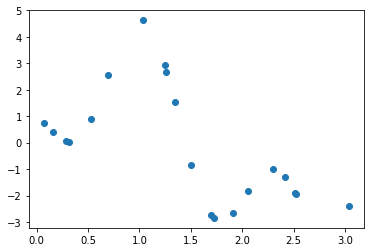

In [35]:
# To Do: Import the data 
# To Do: Scatter plot the data
data = np.loadtxt("./Partial_Data.txt", unpack = True)
XA = data[0]
YA = data[1]
plt.scatter(XA, YA)

#### Step 2: Linear Interpolation
Using your linear interpolation function above, iterate through the sparse data and generate interpolated value.

Here's one method to get you started:

Starting at the 2nd data point, interate through the data, using the current value (let this value be $b$) and the previous data point (let this be $a$ where $b$ > $a$). Interpolate 100 points between the values of ($a, b$) and plot these values. Move onto the next data point and repeat. 

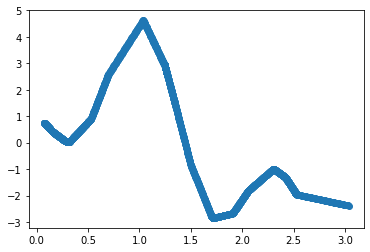

In [39]:
# To Do: Generate and plot interpolated data
lx_new = np.array([])
ly_new = np.array([])
for i in range(1, len(XA)):
    b = XA[i]
    a = XA[i-1]
    fb = YA[i]
    fa = YA[i-1]
    guess = np.linspace(a, b, 100)
    results = linear_interpolation(guess, a, fa, b, fb)
    lx_new = np.append(lx_new, guess)
    ly_new = np.append(ly_new, results)
#extra thick
plt.scatter(lx_new, ly_new)

#### Step 3: 2nd Order Lagrangian Interpolation
Using your 2nd Order Lagrangian Interpolation function above, iterate through the sparse data and generate interpolated value.

Here's one method to get you started:

Starting at the 3rd data point, interate through the data, using the current value (let this value be $c$) and the previous two (let these be $a$ and $b$ where $b$ > $a$). Interpolate 100 points between the values of ($a, b$) and plot these values. Move onto the next data point and repeat. 

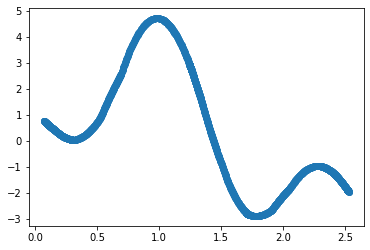

In [55]:
# To Do: Generate and plot interpolated data
qx_new = np.array([])
qy_new = np.array([])
for i in range(2, len(XA)):
    c = XA[i]
    b = XA[i-1]
    a = XA[i-2]
    fc = YA[i]
    fb = YA[i-1]
    fa = YA[i-2]
    guess = np.linspace(a, b, 100)
    results = lagrangian_interpolation(guess, a, fa, b, fb, c, fc)
    qx_new = np.append(qx_new, guess)
    qy_new = np.append(qy_new, results)
#extra thick
plt.scatter(qx_new, qy_new)